In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np
import xarray as xr
import nctoolkit as nc
import datetime

import os, sys

module_path = os.path.abspath(os.path.join('/Users/gilaverbuch/dev/pysst/'))
if module_path not in sys.path:
    sys.path.appendp(module_path)
from src.pysst.pysst import load_data, SST

# from pysst import load_data

nctoolkit is using Climate Data Operators version 2.2.0


In [2]:
date_i = '2019-02-10T15:00'
date_f = '2019-02-11T00:00'

date_i = np.datetime64(date_i)
date_f = np.datetime64(date_f)

s = SST(date_i=date_i, date_f=date_f)

In [3]:
print(s.date_f)

2019-02-11T00:00


In [4]:
s.load_data()

Selecting data in time range 2019-02-10T15:00 -- 2019-02-11T00:00
loading first source...
loading second source...


In [5]:
s.sst

[<xarray.Dataset>
 Dimensions:  (lon: 4500, lat: 3661, time: 4)
 Coordinates:
   * lon      (lon) float64 -100.0 -99.99 -99.98 -99.97 ... -50.02 -50.01 -50.0
   * lat      (lat) float64 20.0 20.01 20.02 20.03 ... 51.98 51.99 51.99 52.0
   * time     (time) datetime64[ns] 2019-02-10T15:37:00 ... 2019-02-10T23:41:00
 Data variables:
     mcsst    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
 Attributes: (12/22)
     url:                       http://www.ceoe.udel.edu, http://marine.rutger...
     groundstation:             RU-COOL L-band receiver at Rutgers University,...
     creator_name:              Matt Oliver
     creator_email:             moliver@udel.edu
     institution:               University of Delaware
     source:                    NOAA AVHRR
     ...                        ...
     publisher_url:             http://maracoos.org
     Conventions:               ACDD-1.3, CF-1.6
     Metadata_Conventions:      Unidata Dataset Discovery v1.0
     NCO:   

In [6]:
s.merge()

Mean of empty slice


In [7]:
s.sst

<xarray.Dataset>
Dimensions:        (lon: 4500, lat: 3661, time: 4)
Coordinates:
  * lon            (lon) float64 -100.0 -99.99 -99.98 ... -50.02 -50.01 -50.0
  * lat            (lat) float64 20.0 20.01 20.02 20.03 ... 51.99 51.99 52.0
  * time           (time) datetime64[ns] 2019-02-10T15:37:00 ... 2019-02-10T2...
Data variables:
    mcsst          (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mcsst_source1  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mcsst_source2  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/22)
    url:                       http://www.ceoe.udel.edu, http://marine.rutger...
    groundstation:             RU-COOL L-band receiver at Rutgers University,...
    creator_name:              Matt Oliver
    creator_email:             moliver@udel.edu
    institution:               University of Delaware
    source:                    NOAA AVHRR
    ...                        ...
    publisher_url:             http://maracoos.org
    Conventions:               ACDD-1.3, CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    NCO:                       4.0.8
    composite_members:          20191231.2031 20191231.2031 20191231.2031 201...
    license:                   Freely Distributed

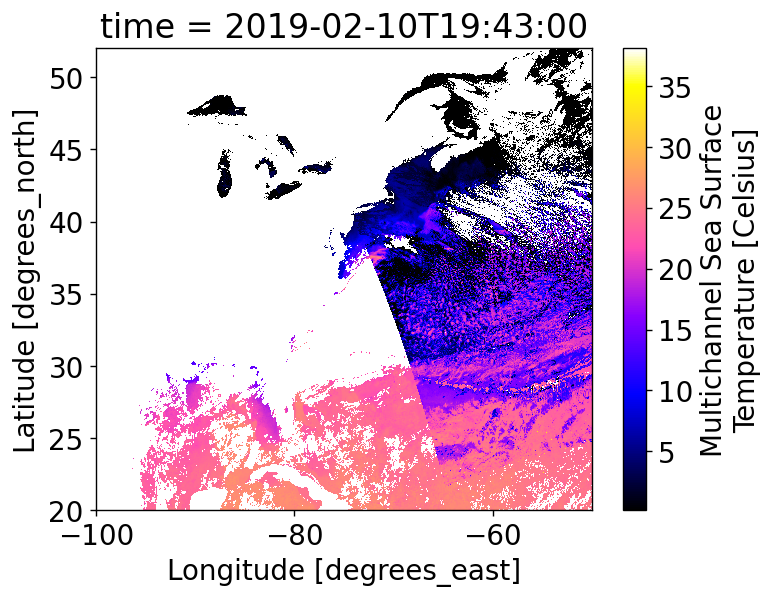

In [9]:
t=1
s.sst.isel(time=t).mcsst.plot(cmap='gnuplot2', clim=(5,35))

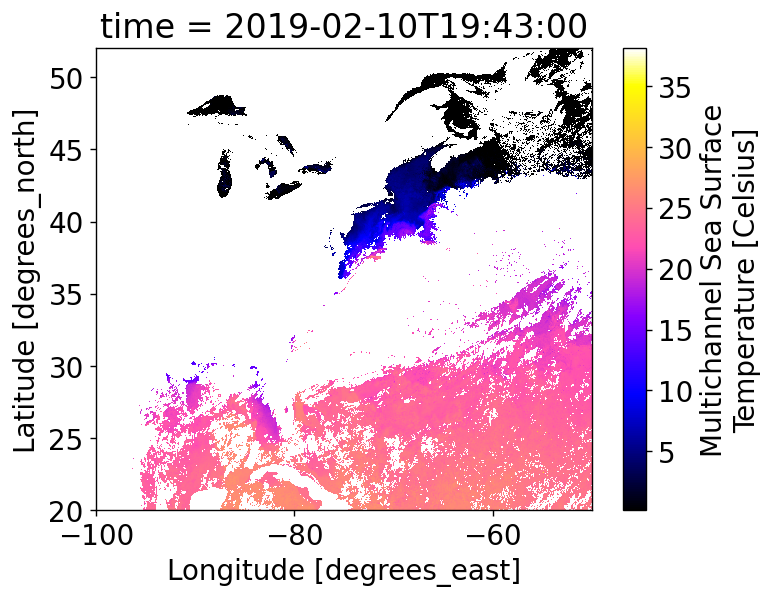

In [10]:
s.sst.isel(time=t).mcsst_source1.plot(cmap='gnuplot2', clim=(5,35))

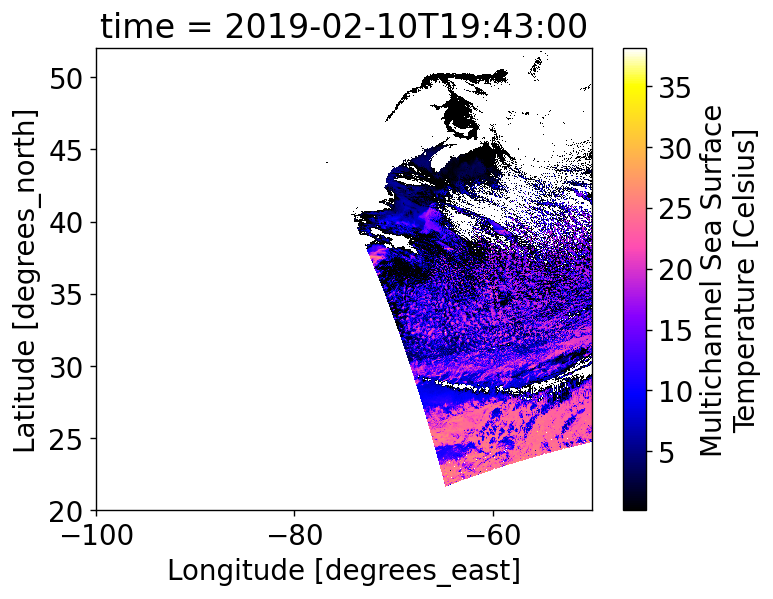

In [11]:
s.sst.isel(time=t).mcsst_source2.plot(cmap='gnuplot2', clim=(5,35))

In [ ]:
date_i = '2019-02-10T15:00'
date_f = '2019-02-11T00:00'

date_i = np.datetime64(date_i)
date_f = np.datetime64(date_f)

sst = load_data(date_i, date_f, merge=True)